In [136]:
import tensorflow as tf

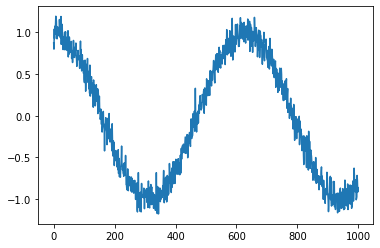

In [137]:
from matplotlib import pyplot as plt

T = 1000
x = tf.math.cos(tf.range((T,), dtype="float32") * 0.01) + tf.random.normal(
    shape=(T,), stddev=0.1
)
plt.plot(x)

In [138]:
# 构造训练集合
tau = 4  # 用前四个数据预测
features = tf.Variable(tf.zeros(shape=(T - tau, tau)), dtype='float32')
for i in range(tau):
    features[:, i].assign(x[i: T - tau + i])
labels = tf.reshape(x[tau:], (-1, 1))[:666]
features = tf.constant(features)[:666]
ds_x = tf.data.Dataset.from_tensor_slices(features)
ds_y = tf.data.Dataset.from_tensor_slices(labels)
train_iter = tf.data.Dataset.zip((ds_x, ds_y)).batch(16)   # 只取前666个

In [139]:
# 使用一个简单的两层全连接
def _net():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        # tf.keras.layers.Dense(16),
        tf.keras.layers.Dense(1)
    ])
net = _net()
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
for epoch in range(10):
    for batch_x, batch_y in train_iter:
        with tf.GradientTape() as gt:
            y_pred = net(batch_x)
            loss = loss_fn(batch_y, y_pred)
        grads = gt.gradient(loss, net.trainable_weights)
        optimizer.apply_gradients(zip(grads, net.trainable_weights))
    print("loss: {}".format(loss))

loss: 2.7217533588409424
loss: 1.718389868736267
loss: 1.1184977293014526
loss: 0.7509832978248596
loss: 0.5236426591873169
loss: 0.3797895908355713
loss: 0.286274790763855
loss: 0.22317977249622345
loss: 0.17710624635219574
loss: 0.14240078628063202


In [140]:
# 预测
pred = net(features)
# plt.plot()

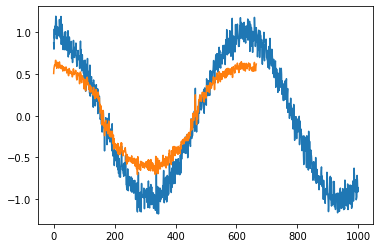

In [141]:
plt.plot(x)
plt.plot(pred)

In [142]:
multi_steps = tf.Variable(tf.zeros(T))
multi_steps[:666 + tau].assign(x[:666 + tau])
for i in range(666 + tau, T):
    multi_steps[i].assign(tf.reshape(net(tf.reshape(multi_steps[i - tau: i], (1, -1))), ()))

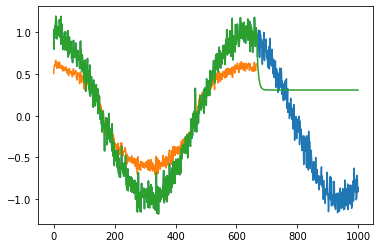

In [143]:
plt.plot(x)
plt.plot(pred)
plt.plot(multi_steps[:])